In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#necessary datasets

postcodes = pd.read_csv('postal_codes_data_final.csv')
postcode_array = postcodes['postcode'].to_numpy()

#create an array for the area in the right unit
area_m2 = postcodes['oppervlakte'].to_numpy()
area_km2 = area_m2 *10e-06

#create an array for the number of inhabitants and calculate population density
inhabitants = postcodes['aantal_inwoners'].to_numpy()
pop_density = inhabitants / area_km2

postcode_density = pd.DataFrame(np.c_[postcode_array, pop_density])

#create postcode population density dictionary
pp_dict = dict(zip(postcode_array,pop_density))


In [2]:
postcodes['aantal_woningen']

0        240
1       1905
2       1490
3        295
4       2370
        ... 
4063     295
4064      35
4065     265
4066      75
4067      40
Name: aantal_woningen, Length: 4068, dtype: int64

In [3]:
#Create array with a percentage students
inhabitants = postcodes['aantal_inwoners'].to_numpy()
students = postcodes['aantal_inwoners_15_tot_25_jaar'].to_numpy()

#Delete neagtive values
for i in range(len(students)):
    if students[i] <= 0:
        students[i]=0

perc_students = students / inhabitants

students_dict = dict(zip(postcode_array,perc_students))
students_dict

{1184: 0.15079365079365079,
 1695: 0.0991636798088411,
 1733: 0.1261127596439169,
 1752: 0.1095890410958904,
 1965: 0.14227309893704007,
 1974: 0.1078838174273859,
 2275: 0.10075839653304441,
 2524: 0.14275517487508924,
 2542: 0.11835170100622903,
 2551: 0.08568864961866307,
 2585: 0.09925373134328358,
 2591: 0.08287292817679558,
 2593: 0.08614668218859138,
 2642: 0.14135802469135803,
 2662: 0.11575875486381323,
 2719: 0.1245674740484429,
 3222: 0.11916461916461916,
 3315: 0.14176749079431877,
 3768: 0.10705394190871369,
 3781: 0.11891117478510028,
 3902: 0.12618595825426945,
 4211: 0.12413793103448276,
 4651: 0.1288791529755385,
 4812: 0.15077071290944125,
 4872: 0.10858442296759523,
 4901: 0.09741176470588235,
 5151: 0.11006658832745789,
 5242: 0.10939112487100103,
 5347: 0.08860759493670886,
 5709: 0.13363705391040243,
 6163: 0.11360718870346598,
 6307: 0.10606060606060606,
 7003: 0.10034602076124567,
 7256: 0.11578947368421053,
 7483: 0.155,
 7544: 0.13723638652817122,
 8015: 0.131

In [4]:
stations = pd.read_csv('NS_stations_met_aangrenzende_postcodes.csv', delimiter = ',')
stations

#calculate population density for zone1
zone1_arr = stations['postcode_aangrenzende_postcode_gebieden'].to_numpy()

#split strings into lists
for i in range(len(zone1_arr)):
    zone1_arr[i] = zone1_arr[i].split(',') 

#create array with students for zone1
students_zone1 = np.zeros(len(zone1_arr))

#calculate average students percentage of postal codes
for j in range(len(zone1_arr)):
    sum_students = 0
    for i in range(len(zone1_arr[j])):    
        sum_students += students_dict[int(zone1_arr[j][i])]
    avg_students = sum_students/len(zone1_arr[j])
    students_zone1[j] = avg_students

# add to dataframe
stations['students_zone1'] = students_zone1 * 100 #in %
stations

,station_naam,postcode_gebied_station,postcode_aangrenzende_postcode_gebieden,students_zone1
0,'t-harde,8084,"[8072, 8081, 8084, 8085, 8096, 8162]",12.228883
1,helmond-'t-hout,5707,"[5673, 5674, 5701, 5702, 5706, 5707, 5708, 573...",11.520049
2,abcoude,1391,"[1105, 1106, 1107, 1108, 1109, 1191, 1383, 139...",15.181030
3,akkrum,8491,"[9001, 8467, 8468, 8491, 8493, 8494, 8495, 9011]",11.190890
4,alkmaar,1815,"[1811, 1814, 1815, 1816, 1817, 1823, 1824, 1851]",10.848172
...,...,...,...,...
245,zoetermeer-oost,2712,"[2719, 2665, 2711, 2712, 2713, 2718, 2722]",11.264535
246,utrecht-zuilen,3551,"[3532, 3513, 3534, 3551, 3552, 3553]",15.615666
247,zutphen,7201,"[7201, 7202, 7203, 7204, 7205, 7206]",11.326108
248,zwijndrecht,3331,"[3335, 3311, 3316, 3331, 3332, 3333, 3336, 334...",12.347160


In [5]:
#Create array with a percentage students
houses = postcodes['aantal_woningen'].to_numpy()
houses_after_1985 = postcodes['aantal_woningen_bouwjaar_85_tot_95'].to_numpy() + postcodes['aantal_woningen_bouwjaar_95_tot_05'].to_numpy() + postcodes['aantal_woningen_bouwjaar_05_tot_15'].to_numpy() + postcodes['aantal_woningen_bouwjaar_15_en_later'].to_numpy()

#Delete negative values
for i in range(len(houses_after_1985)):
    if houses_after_1985[i] <= 0:
        houses_after_1985[i]=0

perc_houses_after_1985 = houses_after_1985 / houses

houses_dict = dict(zip(postcode_array,perc_houses_after_1985))
houses_dict

#create array with houses build after 1985
new_houses_zone1 = np.zeros(len(zone1_arr))

#calculate average houses build after 1985 of all houses
for j in range(len(zone1_arr)):
    sum_new_houses = 0
    for i in range(len(zone1_arr[j])):    
        sum_new_houses += houses_dict[int(zone1_arr[j][i])]
    avg_houses_after_85 = sum_new_houses/len(zone1_arr[j])
    new_houses_zone1[j] = avg_houses_after_85
    
# add to dataframe
stations['new_houses_zone1'] = new_houses_zone1 * 100
stations

,station_naam,postcode_gebied_station,postcode_aangrenzende_postcode_gebieden,students_zone1,new_houses_zone1
0,'t-harde,8084,"[8072, 8081, 8084, 8085, 8096, 8162]",12.228883,27.150313
1,helmond-'t-hout,5707,"[5673, 5674, 5701, 5702, 5706, 5707, 5708, 573...",11.520049,39.333213
2,abcoude,1391,"[1105, 1106, 1107, 1108, 1109, 1191, 1383, 139...",15.181030,16.200474
3,akkrum,8491,"[9001, 8467, 8468, 8491, 8493, 8494, 8495, 9011]",11.190890,18.439970
4,alkmaar,1815,"[1811, 1814, 1815, 1816, 1817, 1823, 1824, 1851]",10.848172,19.003818
...,...,...,...,...,...
245,zoetermeer-oost,2712,"[2719, 2665, 2711, 2712, 2713, 2718, 2722]",11.264535,24.286256
246,utrecht-zuilen,3551,"[3532, 3513, 3534, 3551, 3552, 3553]",15.615666,10.242171
247,zutphen,7201,"[7201, 7202, 7203, 7204, 7205, 7206]",11.326108,8.801026
248,zwijndrecht,3331,"[3335, 3311, 3316, 3331, 3332, 3333, 3336, 334...",12.347160,13.585275


In [6]:
#Create array with a percentage social housing
houses = postcodes['aantal_woningen'].to_numpy()
houses_social_housing = postcodes['aantal_huurwoningen_in_bezit_woningcorporaties'].to_numpy()

#Delete negative values
for i in range(len(houses_social_housing)):
    if houses_social_housing[i] <= 0:
        houses_social_housing[i]=0

perc_social_housing = houses_social_housing / houses


In [7]:
soc_housing_dict = dict(zip(postcode_array,perc_social_housing))

#create array with social housing
social_housing_zone1 = np.zeros(len(zone1_arr))

#calculate average social housing of all houses
for j in range(len(zone1_arr)):
    sum_soc_housing = 0
    for i in range(len(zone1_arr[j])):    
        sum_soc_housing += soc_housing_dict[int(zone1_arr[j][i])]
    avg_soc_housing = sum_soc_housing/len(zone1_arr[j])
    social_housing_zone1[j] = avg_soc_housing
    
# add to dataframe
stations['social_housing_zone1'] = social_housing_zone1 * 100
stations

,station_naam,postcode_gebied_station,postcode_aangrenzende_postcode_gebieden,students_zone1,new_houses_zone1,social_housing_zone1
0,'t-harde,8084,"[8072, 8081, 8084, 8085, 8096, 8162]",12.228883,27.150313,27.638318
1,helmond-'t-hout,5707,"[5673, 5674, 5701, 5702, 5706, 5707, 5708, 573...",11.520049,39.333213,27.872835
2,abcoude,1391,"[1105, 1106, 1107, 1108, 1109, 1191, 1383, 139...",15.181030,16.200474,27.409646
3,akkrum,8491,"[9001, 8467, 8468, 8491, 8493, 8494, 8495, 9011]",11.190890,18.439970,14.786322
4,alkmaar,1815,"[1811, 1814, 1815, 1816, 1817, 1823, 1824, 1851]",10.848172,19.003818,24.425413
...,...,...,...,...,...,...
245,zoetermeer-oost,2712,"[2719, 2665, 2711, 2712, 2713, 2718, 2722]",11.264535,24.286256,32.239373
246,utrecht-zuilen,3551,"[3532, 3513, 3534, 3551, 3552, 3553]",15.615666,10.242171,24.366371
247,zutphen,7201,"[7201, 7202, 7203, 7204, 7205, 7206]",11.326108,8.801026,37.187226
248,zwijndrecht,3331,"[3335, 3311, 3316, 3331, 3332, 3333, 3336, 334...",12.347160,13.585275,23.024454


In [8]:
stations = stations.reset_index()

df_ns = pd.read_csv('df_ns_Holland.csv')
df_ns_2019 = df_ns[df_ns['Year'] == 2019].copy()
df_ns_2019 = df_ns_2019.set_index('Station').copy()
stations = stations.set_index('station_naam').copy()

#merge both dataframes
stations_merged = stations.merge(df_ns_2019, left_index=True, right_index=True)
stations_merged

# print(stations.columns)

,index,postcode_gebied_station,postcode_aangrenzende_postcode_gebieden,students_zone1,new_houses_zone1,social_housing_zone1,Year,Reizigers per dag,Klantoordeel,In- en uitstappers,...,Fiets_voor,Fiets_na,Bus/tram/metro_voor,Bus/tram/metro_na,Auto (bestuurder)_voor,Auto (bestuurder)_na,Auto (passagier)_voor,Auto (passagier)_na,(Deel)taxi_voor,(Deel)taxi_na
alkmaar,4,1815,"[1811, 1814, 1815, 1816, 1817, 1823, 1824, 1851]",10.848172,19.003818,24.425413,2019,22018,84%,21495,...,45%,19%,21%,23%,3%,2%,6%,6%,0%,0%
alkmaar-noord,5,1824,"[1815, 1817, 1822, 1823, 1824, 1825, 1826]",10.537111,21.012860,24.022782,2019,5046,52%,5046,...,47%,25%,5%,10%,21%,5%,8%,15%,0%,1%
alphen-aan-den-rijn,8,2405,"[2401, 2404, 2405, 2406, 2407, 2408, 2409, 2771]",11.775448,27.621641,20.289937,2019,12630,72%,10996,...,48%,24%,17%,17%,8%,2%,4%,11%,0%,0%
amsterdam-amstel,10,1097,"[1078, 1079, 1091, 1092, 1093, 1096, 1097, 109...",14.912967,30.622920,38.467865,2019,37793,79%,36100,...,45%,13%,35%,50%,0%,0%,1%,1%,0%,0%
amsterdam-centraal,11,1012,"[1011, 1012, 1013, 1015, 1016, 1017, 1021, 1031]",11.067381,12.500031,36.176430,2019,213035,87%,199510,...,29%,10%,49%,47%,0%,0%,1%,1%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zaandijk-zaanse-schans,240,1541,"[1506, 1507, 1508, 1509, 1541, 1544, 1551]",12.005823,27.714703,31.274226,2019,4535,58%,4535,...,32%,7%,1%,0%,9%,1%,2%,15%,0%,0%
zandvoort-aan-zee,242,2042,"[2041, 2042, 2051, 2114, 2116, 2204]",9.792655,22.954195,21.211402,2019,5858,79%,5858,...,19%,8%,4%,4%,1%,1%,3%,4%,0%,0%
zoetermeer,244,2719,"[2642, 2719, 2641, 2651, 2712, 2713, 2715, 271...",11.678828,28.222678,28.235329,2019,4868,54%,4868,...,34%,9%,18%,18%,14%,3%,8%,9%,0%,0%
zoetermeer-oost,245,2712,"[2719, 2665, 2711, 2712, 2713, 2718, 2722]",11.264535,24.286256,32.239373,2019,2657,59%,2657,...,32%,21%,8%,18%,21%,6%,7%,12%,0%,0%


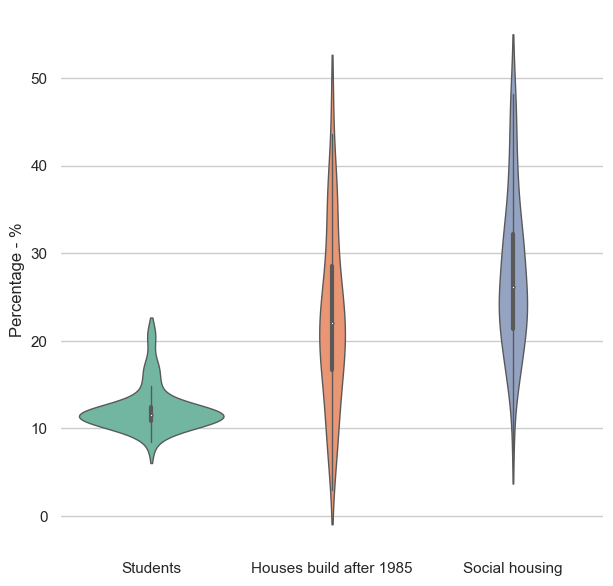

In [9]:
df = stations_merged

df_violin = df[['students_zone1', 'new_houses_zone1', 'social_housing_zone1']]

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(7, 7))

sns.violinplot(data=df_violin, bw_adjust=.5, cut=1, linewidth=1, palette="Set2")

new_labels = ['Students', 'Houses build after 1985', 'Social housing']
ax.set_xticklabels(new_labels)

ax.set_ylabel("Percentage - %")

sns.despine(left=True, bottom=True)
plt.show()

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = stations_merged

fig = make_subplots(rows=1, cols=3, subplot_titles=('students_zone1', 'new_houses_zone1', 'social_housing_zone1'))

fig.add_trace(go.Box(y=df['students_zone1'], name='students_zone1'), row=1, col=1)
fig.add_trace(go.Box(y=df['new_houses_zone1'], name='new_houses_zone1'), row=1, col=2)
fig.add_trace(go.Box(y=df['social_housing_zone1'], name='social_housing_zone1'), row=1, col=3)

fig.show()

In [46]:
import plotly.express as px

# df['Fiets_voor'] = df['Fiets_voor'].str.replace('%', '').astype(float)

stations_merged['Station_Naam'] = stations_merged.index

df_melted = stations_merged.melt(
    id_vars=['students_zone1', 'Station_Naam'],
    value_vars=['Fiets_voor', 'Bus/tram/metro_voor', 'Auto (bestuurder)_voor', 'Auto (passagier)_voor', '(Deel)taxi_voor'], 
    var_name='Voortransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='students_zone1', y='Percentage %', title='First mile transport and percentage students', color='Voortransport', hover_data=['Station_Naam'])
fig.show()

In [48]:
df_melted = stations_merged.melt(
    id_vars=['students_zone1', 'Station_Naam'],
    value_vars=['Fiets_na', 'Bus/tram/metro_na', 'Auto (bestuurder)_na', 'Auto (passagier)_na', '(Deel)taxi_na'], 
    var_name='Natransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='students_zone1', y='Percentage %', title='Last mile transport and percentage students', color='Natransport', hover_data=['Station_Naam'])
fig.show()

In [49]:
df_melted = stations_merged.melt(
    id_vars=['new_houses_zone1', 'Station_Naam'],
    value_vars=['Fiets_voor', 'Bus/tram/metro_voor', 'Auto (bestuurder)_voor', 'Auto (passagier)_voor', '(Deel)taxi_voor'], 
    var_name='Voortransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='new_houses_zone1', y='Percentage %', title='First mile transport and percentage houses build after 1985', color='Voortransport', hover_data=['Station_Naam'])
fig.show()

In [50]:
df_melted = stations_merged.melt(
    id_vars=['new_houses_zone1', 'Station_Naam'],
    value_vars=['Fiets_na', 'Bus/tram/metro_na', 'Auto (bestuurder)_na', 'Auto (passagier)_na', '(Deel)taxi_na'], 
    var_name='Natransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='new_houses_zone1', y='Percentage %', title='Last mile transport and percentage houses build after 1985', color='Natransport', hover_data=['Station_Naam'])
fig.show()

In [53]:
df_melted = stations_merged.melt(
    id_vars=['social_housing_zone1', 'Station_Naam'],
    value_vars=['Fiets_voor', 'Bus/tram/metro_voor', 'Auto (bestuurder)_voor', 'Auto (passagier)_voor', '(Deel)taxi_voor'], 
    var_name='Voortransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='social_housing_zone1', y='Percentage %', title='First mile transport and percentage social housing', color='Voortransport', hover_data=['Station_Naam'])
fig.show()

In [54]:
df_melted = stations_merged.melt(
    id_vars=['social_housing_zone1', 'Station_Naam'],
    value_vars=['Fiets_na', 'Bus/tram/metro_na', 'Auto (bestuurder)_na', 'Auto (passagier)_na', '(Deel)taxi_na'], 
    var_name='Natransport', 
    value_name='Percentage %'
)

fig = px.scatter(df_melted, x='social_housing_zone1', y='Percentage %', title='Last mile transport and percentage social housing', color='Natransport', hover_data=['Station_Naam'])
fig.show()